In [1]:
import os
import sys
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
parent_dir = os.path.dirname(os.path.dirname(notebook_dir))
sys.path.append(parent_dir)
import torch
import numpy as np
import matplotlib.pyplot as plt

from src.models import *
from src.datasets import *
from utils import plot_synthetic_dataset, load_model_from_config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/u/kareemsawah/.local/lib/python3.10/site-packages/torch/nn/modules/rnn.py:879: UserWarning: LSTM with projections is not supported with oneDNN. Using default implementation. (Triggered internally at ../aten/src/ATen/native/RNN.cpp:1492.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,


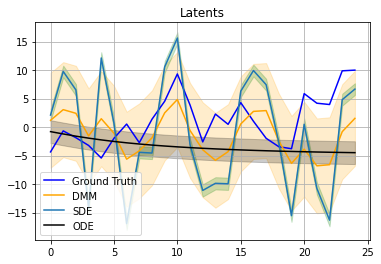

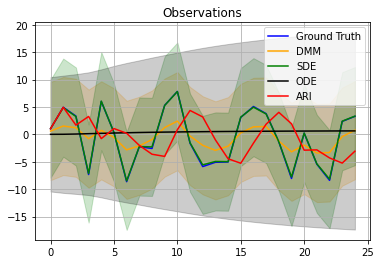

In [2]:

dataloaders = linear_gssm(n_train_samples=5000,
                          n_val_samples=512,
                          n_test_samples=512,
                          n_time_steps=25,
                          batch_size=512,
                          return_latents=True)
observations, latents = next(iter(dataloaders["test"]))

dataset_name = "linear_synthetic"
dmm_path = f"../../configs/dmm/{dataset_name}/fixed_emission.yaml"
sde_path = f"../../configs/sde/{dataset_name}/fixed_emission.yaml"
ode_path = f"../../configs/ode/{dataset_name}/standard.yaml"
ari_path = f"../../models/ARI/{dataset_name}.npy"

dmm = load_model_from_config(dmm_path, device)
sde = load_model_from_config(sde_path, device)
ode = load_model_from_config(ode_path, device)
ari = AutoRegressionIntegrated()
ari.coef = np.load(ari_path)

models = [dmm, sde, ode, ari]
plot_synthetic_dataset(observations, latents, models)

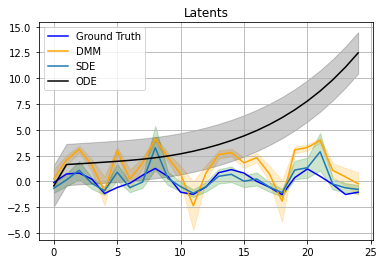

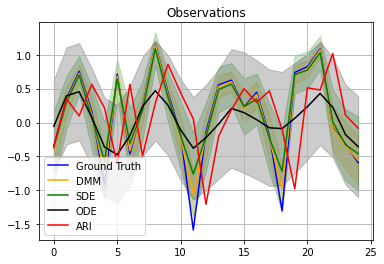

In [3]:
dataloaders = nonlinear_gssm2(n_train_samples=5000,
                          n_val_samples=512,
                          n_test_samples=512,
                          n_time_steps=25,
                          batch_size=512,
                          return_latents=True)
observations, latents = next(iter(dataloaders["test"]))

dataset_name = "non_linear_synthetic2"
dmm_path = f"../../configs/dmm/{dataset_name}/no_fixed.yaml"
sde_path = f"../../configs/sde/{dataset_name}/no_fixed.yaml"
ode_path = f"../../configs/ode/{dataset_name}/standard.yaml"
ari_path = f"../../models/ARI/{dataset_name}.npy"

dmm = load_model_from_config(dmm_path, device)
sde = load_model_from_config(sde_path, device)
ode = load_model_from_config(ode_path, device)
ari = AutoRegressionIntegrated()
ari.coef = np.load(ari_path)

models = [dmm, sde, ode, ari]
plot_synthetic_dataset(observations, latents, models)